#MXNet (From Scratch)

Below are our imports, we are selecting our device as ctx(short for context) to build our model, which is gpu it's if is available otherwise cpu.

In [1]:
from IPython.display import Image # this import is not important, its used for showing images in jupyter notebooks
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

ctx = mx.gpu() if mx.context.num_gpus() > 0 else mx.cpu()
print('No of GPUs available on your system:', mx.context.num_gpus())
print('Chosen device as your ctx:', ctx)

No of GPUs available on your system: 1
Chosen device as your ctx: gpu(0)


##Creating the custom dataset.

In [2]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def function(x):
    return 2 * x[:, 0] - 0.2 * x[:, 1] + 2.4

train_x = nd.random.normal(shape = (num_examples, num_inputs))
noise = 0.1 * nd.random.normal(shape = (num_examples,))
train_y = function(train_x) + noise

test_x = nd.random.normal(shape = (1000, num_inputs))
noise = 0.1 * nd.random.normal(shape = (1000,))
test_y= function(test_x) + noise

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

(10000, 2)
(10000,)
(1000, 2)
(1000,)


##Visualizing training dataset

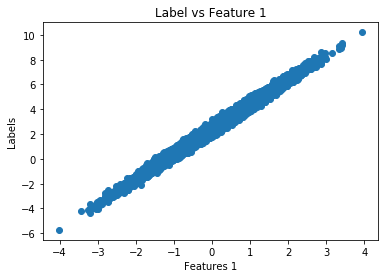

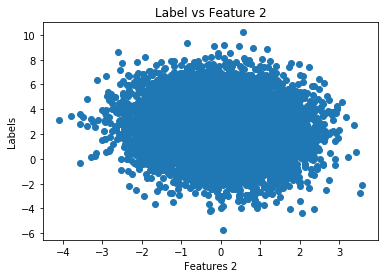

In [3]:
plt.scatter(train_x[:, 0].asnumpy(), train_y.asnumpy())
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.show()

plt.scatter(train_x[:, 1].asnumpy(), train_y.asnumpy())
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.show()

##Visualizing testing dataset

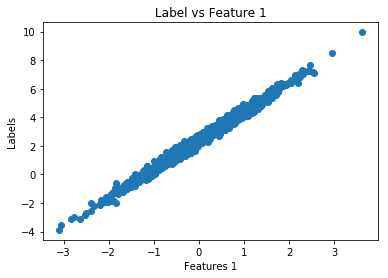

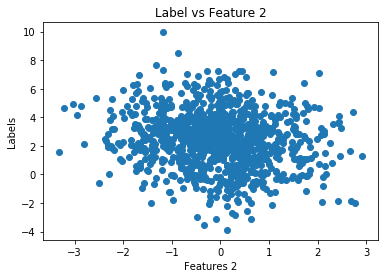

In [4]:
plt.scatter(test_x[:, 0].asnumpy(), test_y.asnumpy())
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.show()

plt.scatter(test_x[:, 1].asnumpy(), test_y.asnumpy())
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.show()

##Defining data iterator for training dataset

In [5]:
batch_size = 16
dataset = gluon.data.DataLoader(gluon.data.ArrayDataset(train_x, train_y), batch_size = batch_size, shuffle = True)

print('No of batches for batch size {} is {}'.format(batch_size, len(dataset)))

No of batches for batch size 16 is 625


##Building linear regression model

Below we are initializing our model parameters for our model, and attaching gradient to them to convert them into differentiable parameters.(Note that we are initializing our parameters for context ctx, which we have initialized above)

In [0]:
weight = nd.random.normal(shape = (num_inputs, num_outputs), ctx = ctx)
bias = nd.random.normal(shape = num_outputs, ctx = ctx)
params = [weight, bias]

for param in params:
    param.attach_grad()

def linearregression(inputs):
    return nd.dot(inputs, weight) + bias

##Defining our objective function

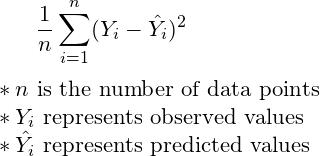

In [7]:
Image("https://study.com/cimages/multimages/16/4e7cf150-0179-4d89-86f2-5cbb1f51c266_meansquarederrorformula.png")

In [0]:
def meansquare(predictions, labels):
    return nd.mean((predictions - labels) ** 2.0)

##Defining our parameters optimizer(Gradient Decent)

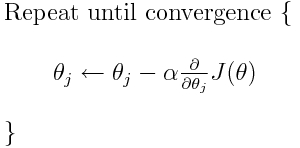

In [9]:
Image("https://www.codeproject.com/KB/recipes/879043/GradientDescent.jpg")

param.grad returns gradient calculated for the parameter

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

##Training the model

In [11]:
epochs = 20
num_batches = len(dataset)
learning_rate = .0001
losses = []

for epoch in range(epochs):
    cumulative_loss = 0
    for features, labels in dataset:
        features = features.as_in_context(ctx) # .as_in_context put features stored in cpu to ctx(which we have initialized above)
        labels = labels.as_in_context(ctx).reshape((-1, 1)) # .as_in_context put labels stored in cpu to ctx(which we have initialized above)
        with autograd.record():
            output = linearregression(features)
            loss = meansquare(output, labels)
        loss.backward()
        sgd(params, learning_rate)
        cumulative_loss += loss

    print('Epoch: {} Loss: {}'.format(epoch, cumulative_loss.asscalar()/num_batches))
    losses.append(cumulative_loss.asscalar()/num_batches)

Epoch: 0 Loss: 16.43521875
Epoch: 1 Loss: 12.77724140625
Epoch: 2 Loss: 9.93395234375
Epoch: 3 Loss: 7.72390625
Epoch: 4 Loss: 6.006013671875
Epoch: 5 Loss: 4.67072890625
Epoch: 6 Loss: 3.63280546875
Epoch: 7 Loss: 2.8260220703125
Epoch: 8 Loss: 2.198930859375
Epoch: 9 Loss: 1.7114826171875
Epoch: 10 Loss: 1.3325873046875
Epoch: 11 Loss: 1.0380564453125
Epoch: 12 Loss: 0.809114453125
Epoch: 13 Loss: 0.631151953125
Epoch: 14 Loss: 0.4928265625
Epoch: 15 Loss: 0.3852996826171875
Epoch: 16 Loss: 0.3017164794921875
Epoch: 17 Loss: 0.2367431640625
Epoch: 18 Loss: 0.1862339111328125
Epoch: 19 Loss: 0.14697265625


In [0]:
def plot(losses, model = linearregression, sample_size=100):
    xs = list(range(len(losses)))
    plt.plot(xs, losses, '-r')
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    ####################################
    # Visualizing training predictions #
    ####################################
    plt.plot(train_x[:sample_size, 0].asnumpy(),
             model(train_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(train_x[:sample_size, 0].asnumpy(),
             function(train_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 1')
    plt.show()
    
    plt.plot(train_x[:sample_size, 1].asnumpy(),
             model(train_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(train_x[:sample_size, 1].asnumpy(),
             function(train_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 2')
    plt.show()
    ####################################
    # Visualizing testing predictions #
    ####################################
    plt.plot(test_x[:sample_size, 0].asnumpy(),
             model(test_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(test_x[:sample_size, 0].asnumpy(),
             function(test_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 1')
    plt.show()
    
    plt.plot(test_x[:sample_size, 1].asnumpy(),
             model(test_x[:sample_size, :].as_in_context(ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(test_x[:sample_size, 1].asnumpy(),
             function(test_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 2')
    plt.show()

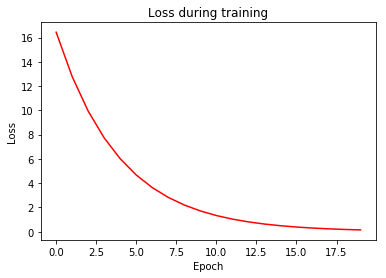

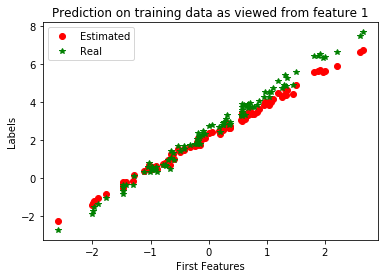

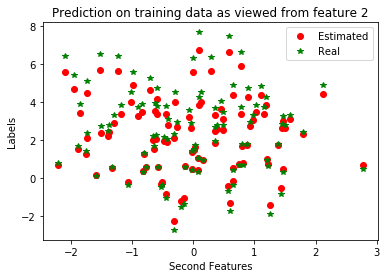

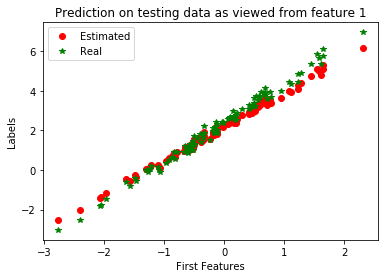

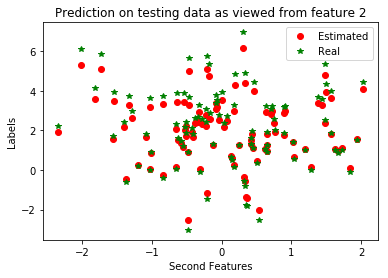

In [13]:
plot(losses)

##Lets look out our weight and bias value after training

In [14]:
print(f'Weight: {weight}')
print(f'Bias: {bias}')

Weight: 
[[ 1.7279253 ]
 [-0.12363056]]
<NDArray 2x1 @gpu(0)>
Bias: 
[2.1984603]
<NDArray 1 @gpu(0)>
